In [1]:
1+1

2

In [16]:
!pip install pandas-datareader


In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
!pip install yfinance
import yfinance as yf


In [13]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451467  6.487880  6.417460  6.458087  601904800
2010-01-06  6.348846  6.477045  6.342226  6.451466  552160000
2010-01-07  6.337109  6.379842  6.291066  6.372319  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800


In [20]:
print(df.columns)


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


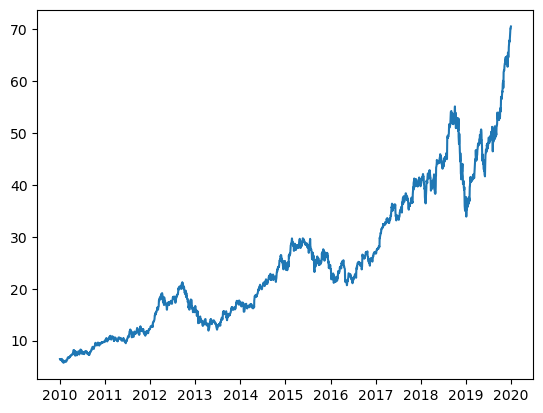

In [21]:
plt.plot(df.Close)

In [22]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,57.212839
2019-12-24,57.410470
2019-12-26,57.647438


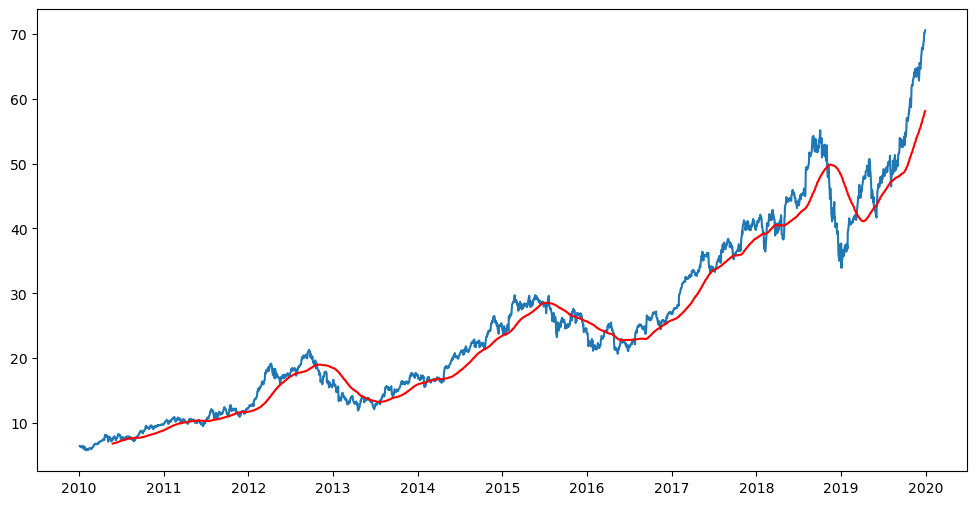

In [23]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [24]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,52.164465
2019-12-24,52.291901
2019-12-26,52.425207


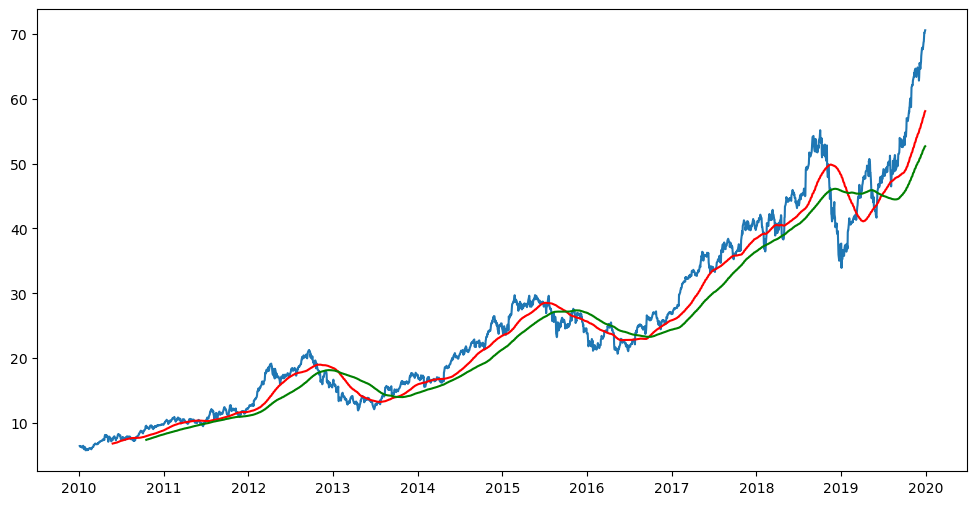

In [25]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [18]:
### splitting data into training and testing ###

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.02759996],
       [0.02806505],
       [0.02377922],
       ...,
       [0.88408425],
       [0.89123163],
       [0.88640232]])

In [24]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [25]:
### ML Model starts here

import tensorflow as tf 

In [26]:
!pip install keras 

In [27]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential


In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = (x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))

model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))

model.add(Dropout(0.5))


model.add(Dense(units = 1))

c:\Users\SATHVIKA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 28s 247ms/step - loss: 0.1467
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - loss: 0.0115
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 239ms/step - loss: 0.0109
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - loss: 0.0123
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - loss: 0.0102
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - loss: 0.0083
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 236ms/step - loss: 0.0083
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - loss: 0.0065
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - loss: 0.0078
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - loss: 0.0071
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - loss: 0.0067
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - loss: 0.0063
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - loss: 0.0067
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - loss: 0.0052
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [32]:
model.save('Keras_model.h5')

In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = past_100_days.append(data_testing,ignore_index = True)

final_df.head()

C:\Users\SATHVIKA\AppData\Local\Temp\ipykernel_18380\1013448498.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index = True)


Ticker,AAPL
0,24.935091
1,25.036331
2,24.849958
3,24.833855
4,24.891376


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573541],
       [0.0278964 ],
       [0.02391823],
       [0.02357449],
       [0.02480231],
       [0.03118722],
       [0.03069593],
       [0.02991022],
       [0.02922266],
       [0.03059774],
       [0.02642305],
       [0.02809292],
       [0.02406565],
       [0.02180634],
       [0.01871225],
       [0.01812293],
       [0.0140955 ],
       [0.01458674],
       [0.01768083],
       [0.02259222],
       [0.02244488],
       [0.02568651],
       [0.01173807],
       [0.        ],
       [0.01134519],
       [0.02367269],
       [0.042434  ],
       [0.06109735],
       [0.0579051 ],
       [0.0513238 ],
       [0.05127458],
       [0.05117642],
       [0.05643163],
       [0.04705095],
       [0.04788569],
       [0.04891711],
       [0.05314102],
       [0.04444782],
       [0.04872075],
       [0.04611757],
       [0.04847513],
       [0.04872075],
       [0.05284626],
       [0.05368127],
       [0.06345491],
       [0.0646826 ],
       [0.06979059],
       [0.068

In [36]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [37]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [38]:
### Making predictions 

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step


In [39]:
y_test

array([0.06973795, 0.06524578, 0.06687482, 0.06623311, 0.06914554,
       0.07556314, 0.08089464, 0.08148713, 0.08464644, 0.08217823,
       0.08114152, 0.08588073, 0.08583123, 0.08479468, 0.08588073,
       0.08627556, 0.08573258, 0.09516146, 0.0954576 , 0.09550719,
       0.09392725, 0.09254497, 0.12907578, 0.12798968, 0.1307049 ,
       0.13667804, 0.14279949, 0.14531717, 0.15002739, 0.14853983,
       0.15434075, 0.16291812, 0.16534737, 0.16455412, 0.1663888 ,
       0.17124755, 0.17328038, 0.17040479, 0.17104911, 0.17238775,
       0.17268532, 0.1865674 , 0.18245256, 0.18651806, 0.1843365 ,
       0.18522893, 0.18265083, 0.18106409, 0.18334507, 0.18364243,
       0.18260116, 0.18988948, 0.19103001, 0.18755925, 0.19484749,
       0.18681551, 0.19464913, 0.19217013, 0.19078183, 0.19197186,
       0.20644933, 0.20803558, 0.20709381, 0.20575493, 0.20595337,
       0.21125816, 0.20753994, 0.20575493, 0.20416876, 0.20332544,
       0.19569024, 0.19653308, 0.19281462, 0.19668209, 0.19355

In [40]:
y_predicted

array([[0.12584448],
       [0.1268792 ],
       [0.12786269],
       [0.12877   ],
       [0.12958328],
       [0.1302965 ],
       [0.13092354],
       [0.13149619],
       [0.13204849],
       [0.13261262],
       [0.13320763],
       [0.13383721],
       [0.13450494],
       [0.13521175],
       [0.13595068],
       [0.13671154],
       [0.13746452],
       [0.1382058 ],
       [0.13894431],
       [0.13969442],
       [0.14046568],
       [0.14125833],
       [0.14206302],
       [0.1429348 ],
       [0.14394672],
       [0.14515643],
       [0.14660884],
       [0.14833923],
       [0.15036395],
       [0.15265226],
       [0.15518522],
       [0.15794517],
       [0.16091979],
       [0.16409542],
       [0.16742738],
       [0.1708309 ],
       [0.17430222],
       [0.17783022],
       [0.18136618],
       [0.18485913],
       [0.18828188],
       [0.19160432],
       [0.1948134 ],
       [0.19789654],
       [0.20083904],
       [0.20363462],
       [0.2062755 ],
       [0.208

In [41]:
scaler.scale_

array([0.02134523])

In [42]:
scale_factor = 1/0.02134523
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

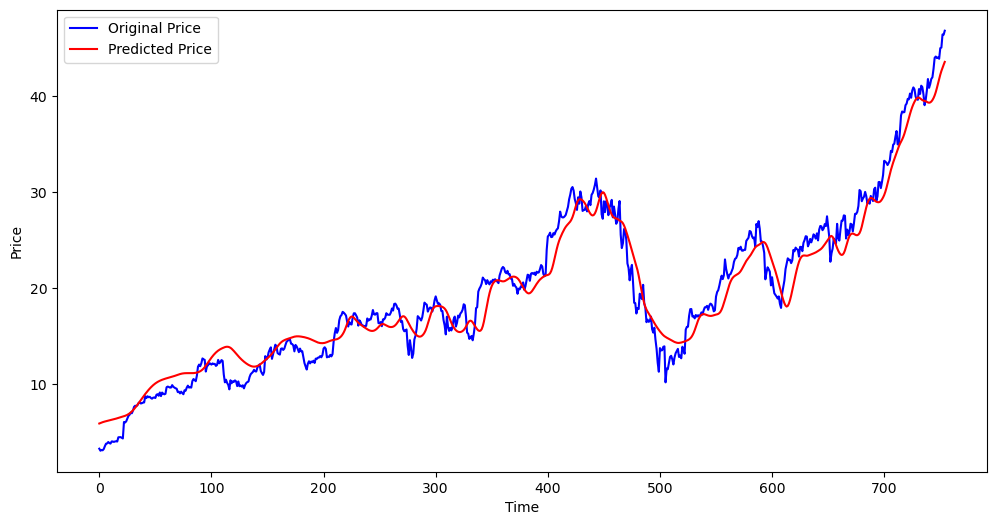

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')  # Removes extra dimensions
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
